In [65]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

#files to load 

Crime_data_to_load = "data/Hate_crime.csv"
Police_data_to_load = "data/Police_Employee_data.csv"
Unemployment_data_to_load = "data/Unemployment.csv"
Poverty_data_to_load = "data/poverty_2017.csv"

#read the csv files

crime_df = pd.read_csv(Crime_data_to_load)
police_df = pd.read_csv(Police_data_to_load)
unemployment_df = pd.read_csv(Unemployment_data_to_load)
poverty_df = pd.read_csv(Poverty_data_to_load)

# clean up crime_df dataframe

In [66]:
#rename columns in crime_df dataframe
crime_df = crime_df.rename(columns={'INCIDENT_ID': 'ID', 'DATA_YEAR': 'Year', 'PUB_AGENCY_UNIT':'Agency Unit','PUB_AGENCY_NAME': 'Agency Name', 
                         'AGENCY_TYPE_NAME': 'Agency Type', 'STATE_ABBR': 'State Abbr.', 'STATE_NAME': 'State', 'DIVISION_NAME':'Division',
                         'REGION_NAME': 'Region', 'POPULATION_GROUP_CODE':'Pop. Group Code', 'POPULATION_GROUP_DESC':'Pop. Group Desc.',
                         'INCIDENT_DATE':'Incident Date','ADULT_VICTIM_COUNT': 'Adult Victim Count', 'JUVENILE_VICTIM_COUNT': 'Juvenile Victim Count',
                         'TOTAL_OFFENDER_COUNT': 'Total Offender Count', 'ADULT_OFFENDER_COUNT': 'Adult Offender Count', 
                         'JUVENILLE_OFFENDER_COUNT':'Juvenille Offender Count','OFFENDER_RACE':'Offender Race', 'OFFENDER_ETHNICITY': 'Offender Ethnicity', 
                         'VICTIM_COUNT': 'Victim Count', 'OFFENSE_NAME':'Offense Name', 'TOTAL_INDIVIDUAL_VICTIMS': 'Total Indiv. Victims',
                         'LOCATION_NAME': 'Location', 'BIAS_DESC':'Bias Desc', 'VICTIM_TYPES': 'Victim Type', 'MULTIPLE_OFFENSE': 
                         'Multiple Offense', 'MULTIPLE_BIAS': 'Multiple Bias'
                        }) 

#drop all null values in dataframe
#crime_df.dropna()

crime_df

,ID,Year,ORI,Agency Name,Agency Unit,Agency Type,State Abbr.,State,Division,Region,...,Offender Race,Offender Ethnicity,Victim Count,Offense Name,Total Indiv. Victims,Location,Bias Desc,Victim Type,Multiple Offense,Multiple Bias
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
5,3018,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,1.0,Grocery/Supermarket,Anti-White,Individual,S,S
6,3019,1991,AR0600200,Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,School/College,Anti-White,Individual,S,S
7,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
8,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
9,3020,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Robbery,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S


# clean up police_df dataframe

In [67]:
#rename columns in police_df dataframe
police_df = police_df.rename(columns={'state_abbr': 'State Abbr.', 'data_year': 'Year','population': 'Population',
                                      'male_officer_ct':'Male Officer Count', 'male_civilian_ct': 'Male Civilian Count',
                                      'male_total_ct':'Male Total Count', 'female_officer_ct':'Female Officer Count',
                                      'female_civilian_ct':'Female Civilian Count', 'female_total_ct':'Female Total Count',
                                      'officer_ct':'Officer Count', 'civilian_ct': 'Civilian Count', "total_pe_ct":
                                      'Total Police Employee Count', 'pe_ct_per_1000':'Police Employee Count/1000'
                                      })

police_df.head()

,State Abbr.,Year,Population,Male Officer Count,Male Civilian Count,Male Total Count,Female Officer Count,Female Civilian Count,Female Total Count,Officer Count,Civilian Count,Total Police Employee Count,Police Employee Count/1000
0,AK,2000,631027,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
1,AL,2000,4488050,9529.0,1847.0,11376.0,769.0,3176.0,3945.0,10298.0,5023.0,15321.0,3.41
2,AR,2000,2934348,5315.0,1130.0,6445.0,541.0,1814.0,2355.0,5856.0,2944.0,8800.0,3.00
3,AS,2000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,2000,5248863,9461.0,3364.0,12825.0,1117.0,4319.0,5436.0,10578.0,7683.0,18261.0,3.48


#  clean up unemployment_df dataframe

In [170]:
#original unemployment dataframe
unemployment_df

#selecting only the columns needed from original dataframe as part of cleaning it up
cleaned_unemployment_df = unemployment_df[["Unnamed: 4", "Unnamed: 6", "Unnamed: 8", "Unnamed: 10", "Unnamed: 12",
                                          "Unnamed: 14", "Unnamed: 16", "Unnamed: 18", "Unnamed: 20", 
                                          "Unnamed: 22", "Unnamed: 23"]]

#renaming column names
cleaned_unemployment_df.columns = ['State', '2009','2010','2011','2012','2013','2014','2015',
                                   '2016','2017','Median Household Income']

#dropping the first row as part of cleaning the dataframe up 
cleaned_unemployment_df = cleaned_unemployment_df.drop(cleaned_unemployment_df.index[0])

#filling in null values with a 0
cleaned_unemployment_df = cleaned_unemployment_df.fillna(0)

cleaned_unemployment_df.head()

,State,2009,2010,2011,2012,2013,2014,2015,2016,2017,Median Household Income
1,Alabama,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.9,4.4,"$48,193"
2,Alaska,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.2,"$74,058"
3,Arizona,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,"$56,508"
4,Arkansas,7.8,8.2,8.3,7.6,7.2,6.0,5.0,3.9,3.7,"$45,916"
5,California,11.2,12.2,11.7,10.4,8.9,7.5,6.2,5.5,4.8,"$71,785"


# clean up poverty_df dataframe

In [69]:
#original poverty dataframe
poverty_df

#selecting only the columns needed from original dataframe as part of cleaning it up
cleaned_poverty_df = poverty_df[["Name", "Percent", "Lower Bound",
                                "Upper Bound", "Percent.1", "Lower Bound.1", "Upper Bound.1"]]

#renaming column names
cleaned_poverty_df.columns = ['State', 'Percent (All People in Poverty)', 'Lower Bound', 'Upper Bound', 
                              'Percent (Children 0-17 in Poverty)', 'Lower Bound', 'Upper Bound']

#dropping the first row as part of cleaning the dataframe up 
cleaned_poverty_df = cleaned_poverty_df.drop(cleaned_poverty_df.index[0:3])

#filling in null values with a 0
cleaned_poverty_df = cleaned_poverty_df.fillna(0)

cleaned_poverty_df.head()

,State,Percent (All People in Poverty),Lower Bound,Upper Bound,Percent (Children 0-17 in Poverty),Lower Bound,Upper Bound
3,Arkansas,16.3,15.9,16.7,22.5,21.5,23.5
4,California,13.3,13.2,13.4,18.1,17.8,18.4
5,Colorado,10.3,10.0,10.6,12.2,11.5,12.9
6,Connecticut,9.7,9.3,10.1,13.0,12.2,13.8
7,Delaware,13.0,12.4,13.6,17.7,16.5,18.9


# merge crime_df and police_df

In [70]:
#merge the crime dataframe and the police dataframe
crime_police_merged = pd.merge(crime_df, police_df, on=("State Abbr.","Year"))
crime_police_merged.head()

,ID,Year,ORI,Agency Name,Agency Unit,Agency Type,State Abbr.,State,Division,Region,...,Male Officer Count,Male Civilian Count,Male Total Count,Female Officer Count,Female Civilian Count,Female Total Count,Officer Count,Civilian Count,Total Police Employee Count,Police Employee Count/1000
0,70308,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
1,70309,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
2,70310,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
3,70311,2000,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,1066.0,208.0,1274.0,103.0,481.0,584.0,1169.0,689.0,1858.0,2.94
4,65648,2000,AR0080300,Green Forest,NaN,City,AR,Arkansas,West South Central,South,...,5315.0,1130.0,6445.0,541.0,1814.0,2355.0,5856.0,2944.0,8800.0,3.00


# filter crime & police merged dataframe to data we need

In [71]:
#shorten the merged crime & police dataframe 
crime_police_shorter = crime_police_merged.loc[:, ["State Abbr.", "Year", "Male Officer Count",
                                                   "Female Officer Count","Total Offender Count"]]

#select years between 2014 - 2017
year = (crime_police_shorter["Year"] >= 2014) &  (crime_police_shorter['Year'] <= 2017)
crime_police_shorter = crime_police_shorter.loc[year]

#groupby state and year for analysis of crime and police force per state per year
grouped_data = crime_police_shorter.groupby(['State Abbr.', 'Year'])

#sum up the total male officer count, female officer count and total offender count for each year per state
grouped_data.sum().head()

Male Officer Count  Female Officer Count  \
State Abbr. Year                                             
AK          2014              7254.0                 696.0   
            2015              9600.0                 928.0   
            2016             12716.0                1243.0   
            2017              4540.0                 448.0   
AL          2014            108468.0                8640.0   

                  Total Offender Count  
State Abbr. Year                        
AK          2014                     8  
            2015                     9  
            2016                     6  
            2017                     2  
AL          2014                    11

# Crime Data per Year

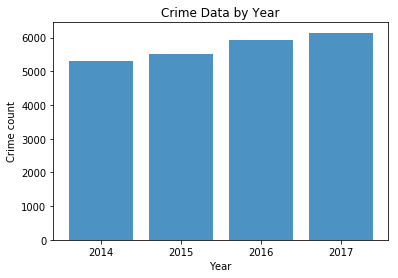

In [183]:
Crime_by_year_df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.', 'Total Offender Count','Offender Race'])


Crime_by_year_df = Crime_by_year_df[Crime_by_year_df.Year >= 2014]
#Crime_by_year_df.head()


Crime_count_by_year_df = Crime_by_year_df.groupby([ "Year"])

ccount = Crime_count_by_year_df['Total Offender Count'].sum()
year = Crime_count_by_year_df['Year'].first()

ccnt_summary_df = pd.DataFrame({'Year' : year,
                              'Total Offender count' : ccount,
                              })

ccnt_summary_df.head()

plt.bar(ccnt_summary_df["Year"], ccnt_summary_df["Total Offender count"], alpha=0.8, align='center')

plt.title("Crime Data by Year")
plt.xlabel("Year")
plt.ylabel("Crime count")
plt.xticks(np.arange(min(ccnt_summary_df["Year"]), max(ccnt_summary_df["Year"]+1), 1.0))

plt.show()

# Crimes per State

Text(0, 0.5, 'Total Crime Count')

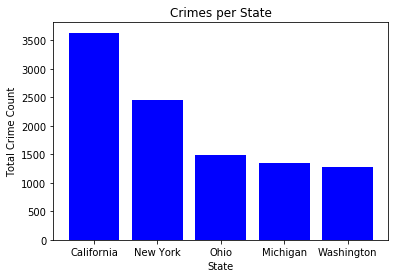

In [184]:
#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])
only_year_2014_2017_4 = (df["Year"] >= 2014) & (df["Year"] <= 2017)


crime_df_4 = df.loc[only_year_2014_2017_4]



groupby_year_state = crime_df_4.groupby(["State"])

crime_year_state = groupby_year_state["Total Offender Count"].sum()

crime_year_state = pd.DataFrame(crime_year_state)

crime_year_state = crime_year_state.sort_values(["Total Offender Count"],ascending=[False]) 

crime_year_state = crime_year_state.reset_index()



crime_year_state = crime_year_state.head()


crime_year_state

#set the x axis
state = (crime_year_state["State"])

#set the y axis
crime = (crime_year_state["Total Offender Count"])

#plot the line graph for California 

plt.bar(state, crime, color="b", align="center")

#set tick locations

#set labels
plt.title("Crimes per State")
plt.xlabel("State")
plt.ylabel("Total Crime Count")

# California Crime Trend From 2014-2017

In [80]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_1 = df.loc[only_year_2014_2017]

#select only California from the dataframe 
only_california = crime_df_1.loc[crime_df_1["State"] == "California", :]

only_california.head()

,Year,State,Total Offender Count
169430,2014,California,1
169431,2014,California,1
169432,2014,California,1
169433,2014,California,0
169434,2014,California,0


In [125]:
#groupby the year
groupby_year_1 = only_california.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014 = groupby_year_1["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014 = pd.DataFrame(crime_count_2014)

#reset the index
crime_count_2014 = crime_count_2014.reset_index()

crime_count_2014

,Year,Total Offender Count
0,2014,800
1,2015,839
2,2016,982
3,2017,1014


Text(0, 0.5, 'Year')

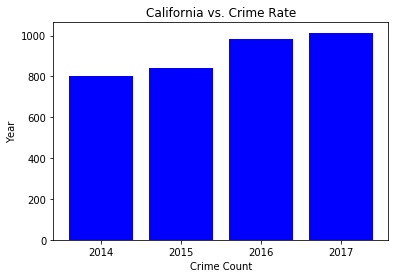

In [141]:
#set the x axis
years = (crime_count_2014["Year"])

#set the y axis
crime = (crime_count_2014["Total Offender Count"])

#plot the line graph for California 

plt.bar(years, crime, color="b", align="center")

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("California vs. Crime Rate")
plt.xlabel("Crime Count")
plt.ylabel("Year")

# New York Crime Trend From 2014-2017

In [127]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017_2 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_2 = df.loc[only_year_2014_2017]

#select only New York from the dataframe 
only_newyork = crime_df_2.loc[crime_df_1["State"] == "New York", :]

only_newyork.head()

,Year,State,Total Offender Count
172610,2014,New York,1
172611,2014,New York,1
172612,2014,New York,1
172613,2014,New York,1
172614,2014,New York,1


In [128]:
#groupby the year
groupby_year_2 = only_newyork.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014_2 = groupby_year_2["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014_2 = pd.DataFrame(crime_count_2014_2)

#reset the index
crime_count_2014_2 = crime_count_2014_2.reset_index()

crime_count_2014_2

,Year,Total Offender Count
0,2014,626
1,2015,575
2,2016,628
3,2017,619


Text(0, 0.5, 'Year')

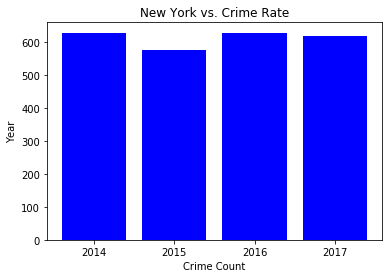

In [185]:
#set the x axis
years = (crime_count_2014_2["Year"])

#set the y axis
crime = (crime_count_2014_2["Total Offender Count"])

#plot the line graph for California 

plt.bar(years, crime, color="b", align="center")

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("New York vs. Crime Rate")
plt.xlabel("Crime Count")
plt.ylabel("Year")

# Ohio Trend From 2014-2017

In [130]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017_3 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_3 = df.loc[only_year_2014_2017]

#select only Ohio from the dataframe 
only_ohio = crime_df_1.loc[crime_df_1["State"] == "Ohio", :]

only_ohio.head()

,Year,State,Total Offender Count
173155,2014,Ohio,1
173156,2014,Ohio,1
173157,2014,Ohio,1
173158,2014,Ohio,0
173159,2014,Ohio,1


In [131]:
#groupby the year
groupby_year_3 = only_ohio.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014_3 = groupby_year_3["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014_3 = pd.DataFrame(crime_count_2014_3)

#reset the index
crime_count_2014_3 = crime_count_2014_3.reset_index()

crime_count_2014_3

,Year,Total Offender Count
0,2014,378
1,2015,358
2,2016,407
3,2017,350


Text(0, 0.5, 'Year')

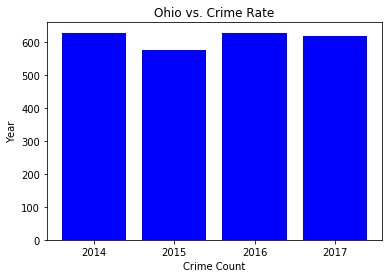

In [147]:
#set the x axis
years = (crime_count_2014_2["Year"])

#set the y axis
crime = (crime_count_2014_2["Total Offender Count"])

#plot the line graph for California 

plt.bar(years, crime, color="b", align="center")

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("Ohio vs. Crime Rate")
plt.xlabel("Crime Count")
plt.ylabel("Year")